# Project Overview

This project aims to analyze the data from the total imports of the top 25 industries in Canada. The objectives are to discover trends and patterns to predict the behavior of these industries for the current year, 2024.

The data was collected from the official website of the [Trade Data Online by the Government of Canada](https://www.ic.gc.ca/app/scr/tdst/tdo/crtr.html?reportType=TI&grouped=GROUPED&searchType=All&timePeriod=5%7cComplete+Years&currency=CDN&naArea=9999&countryList=ALL&productType=NAICS&toFromCountry=CDN&changeCriteria=true).

## Data Collection Criteria

- **Trade Type:** Total imports
- **Trader:** Canada
- **Trading Partner:** All countries (Total)
- **Time Period (Specific Years):** 2019, 2020, 2021, 2022, 2023
- **Value:** $ Canadian (current dollars)
- **Industry:** Top 25 industries (5-digit NAICS codes)

## Libraries Used for Analysis

- **SQLAlchemy:** Used for connecting to the SQLite database, creating tables, and inserting data from CSV files into the database. SQLAlchemy is a powerful SQL toolkit and Object-Relational Mapping (ORM) library that provides a full suite of well-known enterprise-level persistence patterns. It simplifies the interaction with the database, making it easier to execute complex queries and manage database operations.

- **Pandas:** Used for data preparation and cleaning. It allows for easy loading of data from CSV files, handling missing values, and merging multiple datasets into a single DataFrame for comprehensive analysis.

- **NumPy:** Utilized for efficient data manipulation and numerical computations. It provides support for large, multi-dimensional arrays and matrices, which are essential for handling the dataset and performing various mathematical operations. NumPy's functions and operations are highly optimized for performance, enabling faster data processing.

- **Matplotlib:** Employed for data visualization. Matplotlib is used to generate plots, histograms, bar charts, scatter plots, etc., helping in the graphical representation of the data and the results of the analysis.

- **Seaborn:** A statistical data visualization library built on top of Matplotlib. Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It is used to create more sophisticated and aesthetically pleasing visualizations, including complex visualizations like FacetGrid plots.

- **scikit-learn:** Although primarily used for machine learning, in this project it is useful for tasks such as data preprocessing, feature selection, and evaluating the performance of models with various metrics. It provides a comprehensive suite of tools that are valuable even outside the direct application of machine learning algorithms.

- **Statsmodels:** Utilized for time series analysis and econometric modeling. Statsmodels provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and data exploration. The SARIMAX model from Statsmodels is used for modeling and forecasting time series data, capturing seasonality, trends, and other time-dependent structures.

- **fbprophet:** Developed by Facebook, Prophet is used for time series forecasting. It is particularly effective for time series with strong seasonal effects and several seasons of historical data. Prophet allows for automatic detection of yearly, weekly, and daily seasonality and can incorporate holidays into the forecast. It is designed to handle missing data and shifts in the trend, providing robust and interpretable forecasts.

### Installation Instructions
To install the necessary libraries, you can use the following commands:

# For Pandas, NumPy, Matplotlib, Seaborn, and scikit-learn
pip install pandas numpy matplotlib seaborn scikit-learn

# For SQLAlchemy
pip install sqlalchemy

# For Statsmodels
pip install statsmodels

# For fbprophet (Prophet)
pip install prophet


## Project Structure
- **clean_data.py:** Python script for cleaning the data and making predictions.
- **data/:** Directory containing the raw and cleaned data files.
- **notebooks/:** Directory containing Jupyter notebooks for data analysis and documentation.
- **scripts/:** Directory containing scripts for database setup and data loading.
- **README.md:** Project documentation.
- **requirements.txt:** List of dependencies required for the project.


## How to run the code
[gifcolls](https://github.com/gifcolls/canadian-imports-data-analysis)
cd canadian-imports-data-analysis


## Run the script:
../scripts/clean_data.py
##Output:
The cleaned data will be saved as cleaned_data.csv in the data/ directory. The script will also output the predicted import value for the current year.

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine
import sqlite3


## Database Setup

We use a Python script to load data from CSV files into a SQLite database. This script reads the CSV files, processes them, and inserts the data into the database.

## Running Setup Script
We will run the setup script to initialize the database and load data.

In [ ]:
# Run the setup script
%run ../scripts/setup_database.py

In [ ]:
#Verifying the data

import pandas as pd
import sqlite3

# Database connection with absolute path
db_path = 'C:/Users/berli/canadian-imports-data-analysis/data/canadian_imports.db'
conn = sqlite3.connect(db_path)

# Query check
query = "SELECT * FROM cleaned_imports LIMIT 10"
df_check = pd.read_sql_query(query, conn)
print("First 10 rows from the full data query")
print(df_check.to_string())

df_category = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

## Data Cleaning Process

The data cleaning process involves the following steps:

1. **Loading Raw Data**: Loading raw data files for the years 2019-2023.
2. **Column Renaming**: Renaming columns to 'Category' and 'Value', and adding a 'Year' column.
3. **Handling Missing Values**: Checking for missing values and filling them with the mean of the respective column.
4. **Removing Duplicates**: Identifying and removing duplicate rows.
5. **Handling Outliers**: Identifying outliers using Z-scores and iteratively removing them until no new outliers are found.
6. **Saving Cleaned Data**: Saving the cleaned data to a CSV file and loading it into a SQLite database.

In [6]:
### Import Necessary Modules
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import os

### Define the Celaning Function
def clean_data(df, year):
    df.columns = ['Category', 'Value']
    df['Year'] = year
    df = df.dropna(subset=['Category']).copy()
    df = df[~df['Category'].str.contains('Total|Source', case=False, na=False)]
    df['Value'] = df['Value'].replace('[\$,]', '', regex=True)
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    return df

In [3]:
# Run Data Cleaning Script
%run ../scripts/clean_data.py

Missing values in each column:
 Category    0
Value       0
Year        0
dtype: int64
Number of duplicate rows: 0
Number of outliers: 5
Outliers:
    Category       Value  Year
25    Others  291808.569  2019
51    Others  277433.492  2020
77    Others  307880.644  2021
103   Others  366228.859  2022
129   Others  361724.972  2023
Number of outliers after removal: 0
Remaining outliers after removal:
Empty DataFrame
Columns: [Category, Value, Year]
Index: []
Cleaned data saved to ../data/cleaned\cleaned_imports.csv
Cleaned data loaded successfully into the database.
First 10 rows from the cleaned_imports table:
                                            Category      Value  Year
0  21111 - Oil and gas extraction (except oil sands)  22305.242  2019
1  32541 - Pharmaceutical and medicine manufacturing  21545.832  2019
2  33641 - Aerospace product and parts manufacturing  19300.922  2019
3                       32411 - Petroleum refineries  18598.200  2019
4  33411 - Computer and peripher

## Exploratory Data Analysis (EDA)

##Step 1: Understanding the Data Structure
-Data Overview: The dataset contains import data categorized by industry for the years 2019 to 2023.
-Numerical Columns: 'Value' (representing the import value) and 'Year'.
-Categorical Column: 'Category' (representing different industry sectors).

##Step 2: Data Display and Initial Inspection
-Display Settings: The display is configured to show all rows in the DataFrame to avoid truncation and ensure a comprehensive view of the data.
-Database Connection: Connection established with the SQLite database to query and manipulate data.

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3

# To diplsay all the rows from Pandas
pd.set_option('display.max_rows', None)
# Display the first few rows of the dataset
display(df_cleaned_total)


#Database connection
db_path = 'C:/Users/berli/canadian-imports-data-analysis/data/canadian_imports.db'
conn = sqlite3.connect(db_path)

# Checking the data types of each column
print(df_cleaned_total.dtypes, '\n')

# Summarizing statistics for numerical columns
#Calculating value_summary
value_summary = df_cleaned_total['Value'].describe()

#Printing count as an int
print(f"Count: {int(value_summary['count'])}")

#Rest of the summary statistics
for stat in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
    print(f"{stat.capitalize()} : {value_summary[stat]: .6f}")


# Query to group by Category and count occurrences
query = """
SELECT Category, COUNT(*) as Count
FROM cleaned_imports
GROUP BY Category
ORDER BY Count DESC
"""

df_category_counts = pd.read_sql_query(query, conn)
display(df_category_counts)


# Distribution of the 'Year' column
print(df_cleaned_total['Year'].value_counts().sort_index(), '\n')

##Step 3: Findings from the Output
Data Types:

'Category' is an object (string).
'Value' is a float64, indicating it is a numerical column with decimal values.
'Year' is an int32, showing it is a numerical column representing years.
Summary Statistics for 'Value':

Count: 115, indicating there are 115 rows of data.
Mean: 10803.49, representing the average import value.
Standard Deviation (Std): 4347.37, showing the amount of variation or dispersion from the mean.
Minimum (Min): 5026.11, the lowest import value.
25% (1st Quartile): 7663.44, 25% of the values are below this number.
Median (50%): 9644.99, the middle value of the dataset.
75% (3rd Quartile): 12504.38, 75% of the values are below this number.
Maximum (Max): 23513.06, the highest import value.
Categorical Summary:

Each category and its count are displayed, showing the frequency of each industry sector's occurrence in the dataset.
Industries like "Engine, turbine and power transmission equipment manufacturing" and "Motor vehicle gasoline engine and engine parts manufacturing" are among the most frequently occurring categories, each with a count of 5.
Year Distribution:

The data is evenly distributed across the years 2019 to 2023, with slight variations:
2019: 24 entries
2020: 24 entries
2021: 23 entries
2022: 21 entries
2023: 23 entries


##Insights
-The data is well-distributed across the five years, with no significant gaps.
-The import values vary significantly, as indicated by the standard deviation and the range between the minimum and maximum values.
-Certain categories are more prominent in the dataset, potentially indicating key industries with higher import activities.
-The summary statistics provide a good overview of the dataset, confirming that the data is ready for further analysis and visualization.

##Next Steps
1-Visualization: Create visualizations to better understand the trends and patterns in the import data.
2-Trend Analysis: Analyze trends over the years to identify any significant changes in import values.
3-Prediction: Use predictive modeling to forecast future import values for different categories.

##Visualization:

1- Time Series Analysis:

-Bar Plot: To show import values over time for different categories

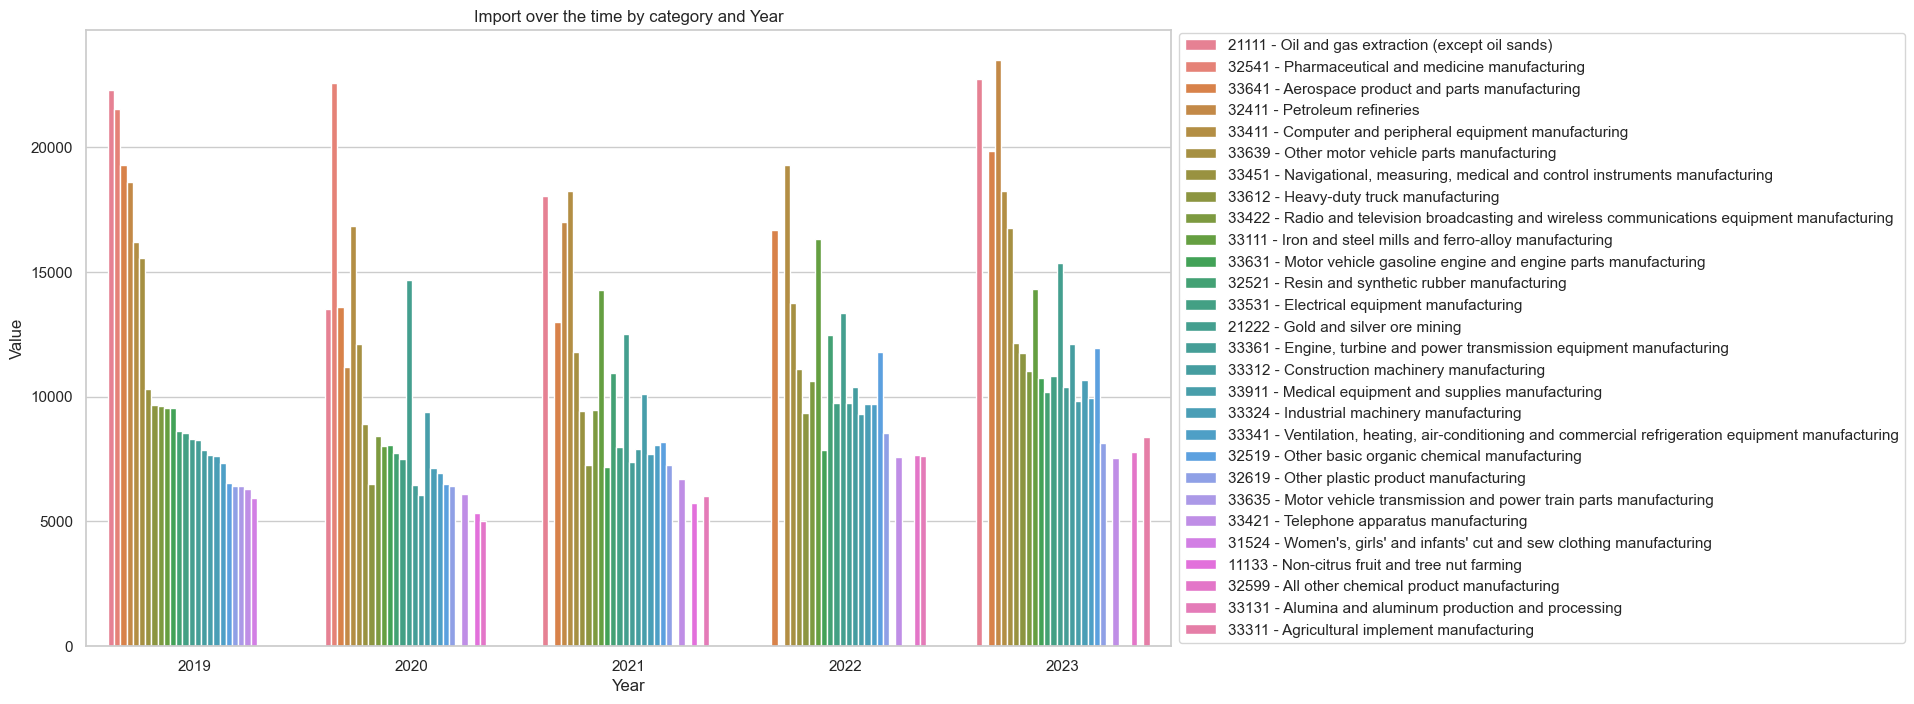

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(data=df_cleaned_total, x='Year', y='Value', hue='Category')
plt.title('Import over the time by category and Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

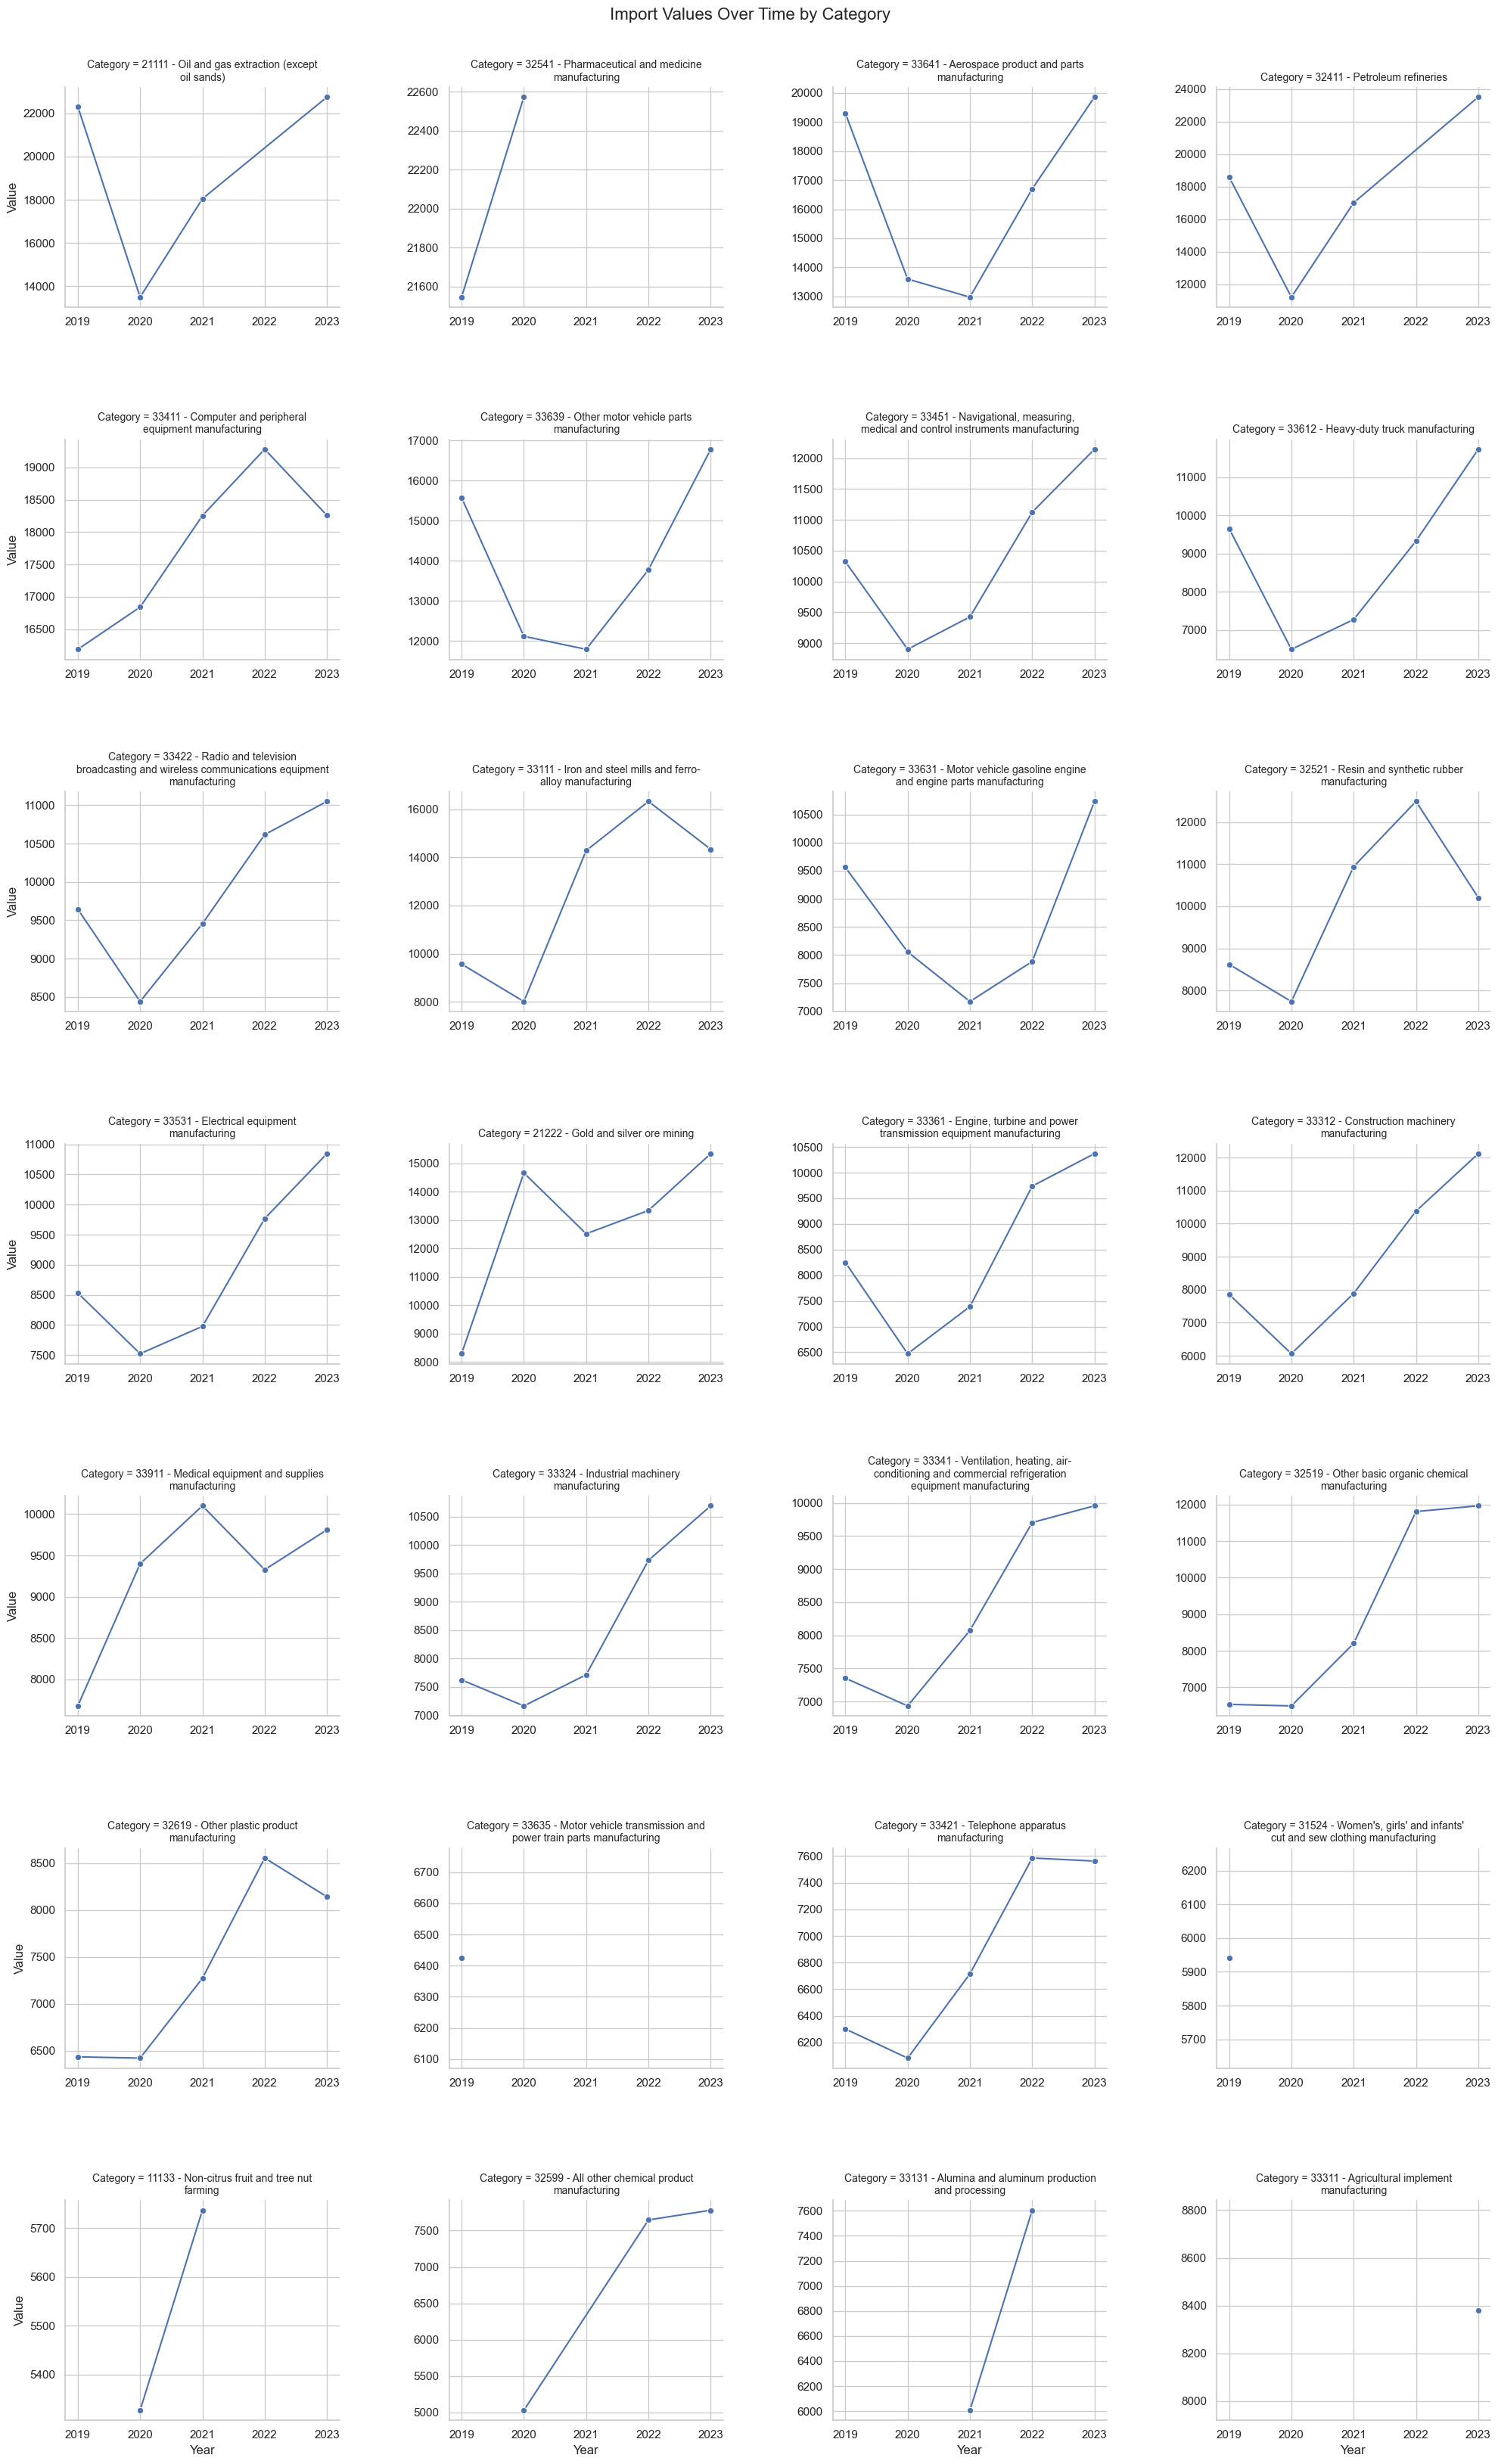

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Function to wrap text for long titles
def wrap_text(text, width=50):
    return '\n'.join(textwrap.wrap(text, width))

# FacetGrid to create multiple plots for each category
g = sns.FacetGrid(df_cleaned_total, col="Category", col_wrap=4, height=5, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="Value", marker='o')

# Wrapping text for titles and setting x-tick labels
for ax in g.axes.flatten():
    title = ax.get_title()
    ax.set_title(wrap_text(title), fontsize=10)
    ax.tick_params(labelbottom=True, rotation=0)

# Setting axis labels and suptitle
g.set_axis_labels("Year", "Value")
g.fig.suptitle('Import Values Over Time by Category', fontsize=16, y=.93)

# Adjust layout for better readability
plt.subplots_adjust(top=0.9, hspace=0.6, wspace=0.4)

plt.show()



## Insights on Import Values Over Time by Category (2019-2023)
Based on the visual analysis of the import data across various categories from 2019 to 2023, several patterns and trends can be observed. These insights can help identify opportunities for potential investments and strategic business decisions.

## Categories with Steady Growth Post-2020 Dip:
Oil and Gas Extraction (except oil sands) (21111)
Petroleum Refineries (32411)
Navigational, Measuring, Medical, and Control Instruments Manufacturing (33451)
Heavy-Duty Truck Manufacturing (33612)
Radio and Television Broadcasting and Wireless Communications Equipment Manufacturing (33422)
Electrical Equipment Manufacturing (33531)
Engine, Turbine, and Power Transmission Equipment Manufacturing (33361)
Construction Machinery Manufacturing (33312)
Industrial Machinery Manufacturing (33324)
Ventilation, Heating, Air-Conditioning, and Commercial Refrigeration Equipment Manufacturing (33341)
Other Basic Organic Chemical Manufacturing (32519)
Pattern: These categories exhibited a dip in 2020, likely due to the global impacts of COVID-19. However, they have shown a consistent recovery and steady growth since then. This trend suggests resilience and an increasing demand in these sectors. Investing in these industries could be beneficial due to their proven ability to recover and grow post-pandemic.

## Categories with Recovery Post-2021:
Aerospace Product and Parts Manufacturing (33641)
Other Motor Vehicle Parts Manufacturing (33639)
Motor Vehicle Gasoline Engine and Engine Parts Manufacturing (33631)
Pattern: These categories experienced a longer recovery period, with dips extending through 2021. However, they have shown a steady increase since then, indicating a delayed but solid recovery. These sectors may have faced prolonged disruptions but are now on a growth trajectory.

## Categories with Short-Term Peaks:
Pharmaceutical and Medicine Manufacturing (32541)
Non-Citrus Fruit and Tree Nut Farming (11133)
Alumina and Aluminum Production and Processing (33131)
All Other Chemical Product Manufacturing (32599)
Pattern: These categories showed significant short-term peaks, likely driven by specific events such as the COVID-19 pandemic for pharmaceuticals. The absence of data post-peak periods suggests a need to investigate further. These industries might have had temporary boosts due to situational demands, and future trends should be monitored closely to assess stability.

## Categories with Decreasing Trends:
Computer and Peripheral Equipment Manufacturing (33411)
Iron and Steel Mills and Ferro-Alloy Manufacturing (33111)
Resin and Synthetic Rubber Manufacturing (32521)
Other Plastic Product Manufacturing (32619)
Telephone Apparatus Manufacturing (33421)
Pattern: These categories showed initial growth but have seen a decline in recent years. The reasons could be market saturation, increased competition, or reduced demand. Understanding the underlying causes of these declines is crucial for making informed decisions about future investments.

## Categories with Fluctuations:
Gold and Silver Ore Mining (21222)
Medical Equipment and Supplies Manufacturing (33911)
Pattern: These categories exhibit significant fluctuations over the years, indicating volatility. While there are periods of growth, they are interspersed with declines, suggesting that these industries are subject to market or external factors influencing their stability.

## Categories Represented by Points:
Motor Vehicle Transmission and Power Train Parts Manufacturing (33635)
Women's, Girls', and Infants' Cut and Sew Clothing Manufacturing (31524)
Agricultural Implement Manufacturing (33311)
Pattern: These categories are represented by points, indicating singular data points within the given time frame. This suggests either limited data availability or very low volume of imports in those years. Further investigation is needed to understand these categories' performance and potential.

## Time Series Forecasting Models

### Why Not Linear Regression?
Linear regression assumes a linear relationship between the independent and dependent variables and does not account for the time-dependent nature of the data. 
Time series data often exhibit trends, seasonality, and autocorrelation, which linear regression cannot handle effectively.

### Choice of Models

#### SARIMAX (Statsmodels)
SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) is chosen for the following reasons:
- **Seasonality**: Can model seasonal patterns in the data.
- **Autoregression**: Accounts for the relationship between an observation and its lagged observations.
- **Moving Average**: Incorporates dependency between an observation and residual errors from a moving average model applied to lagged observations.
- **Differencing**: Handles non-stationary data.
- **Exogenous Variables**: Includes other time-dependent variables affecting the target variable.

#### Fbprophet
`fbprophet` (developed by Facebook) is chosen for its ease of use and specific features:
- **Automatic Seasonality Detection**: Detects and models weekly and yearly seasonality.
- **Holiday Effects**: Incorporates the effects of holidays.
- **Robustness to Missing Data**: Handles missing data and shifts in the trend effectively.
- **Interactive and Exploratory**: Provides easy-to-understand plots for model diagnostics and component analysis.